<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [54]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

### 1. Import the data

In [6]:
df = pd.read_csv('D:\IOD Data/ais.csv')

### 2. Do some EDA of relationships between features.

In [9]:
print(df.head())
df.describe()

    rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht    wt sex  \
0  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9  78.9   f   
1  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7  74.4   f   
2  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8  69.1   f   
3  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0  74.9   f   
4  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6  64.6   f   

    sport  
0  B_Ball  
1  B_Ball  
2  B_Ball  
3  B_Ball  
4  B_Ball  


,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108911,43.091584,14.566337,76.876238,22.955891,69.021782,13.507426,64.873713,180.103960,75.007921
std,0.457976,1.800337,3.662989,1.362451,47.501239,2.863933,32.565333,6.189826,13.070197,9.734494,13.925199
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,5.630000,34.360000,148.900000,37.800000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,8.545000,54.667500,174.000000,66.525000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,11.650000,63.035000,179.700000,74.400000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,18.080000,74.750000,186.175000,84.125000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,35.520000,106.000000,209.400000,123.200000


### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [15]:
# ANSWER
df1 = df.drop(['sex', 'sport'], axis=1)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [21]:
# ANSWER
X = df1
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_


kmeans.cluster_centers_


array([[  4.66236486,   6.96486486,  42.56554054,  14.33581081,
         53.84459459,  22.48027027,  72.54662162,  14.42554054,
         61.96297297, 178.91824324,  72.45202703],
       [  4.87277778,   7.5037037 ,  44.53333333,  15.19814815,
        140.        ,  24.25944444,  59.36111111,  10.99111111,
         72.8512963 , 183.3537037 ,  82.01296296]])

### 5. Get the labels for the models

In [24]:
# ANSWER
pred = kmeans.predict(X)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0
 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [60]:
X3 = df[['bmi', 'rcc']]

In [61]:
# ANSWER
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X3)
    kmeanModel.fit(X3)
 
    distortions.append(sum(np.min(cdist(X3, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X3.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X3, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X3.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

In [62]:
# ANSWER

for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.2191950832295455
2 : 1.5094405199290333
3 : 1.1978551143683116
4 : 0.9317366387462616
5 : 0.8099589773131195
6 : 0.7132973551590409
7 : 0.6359190003543047
8 : 0.6144246647595918
9 : 0.5626968887445557


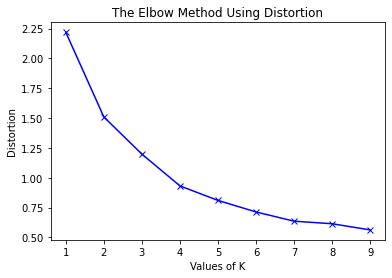

In [63]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method Using Distortion')
plt.show()

### 7. Plot `ht` vs. `wt` using the clusters from each model.

- Plot ht, wt using hue sex
- Plot ht, wt using hue label

Each time, compare to the actual species classification.

In [48]:
# ANSWER
df2 = df[['wt', 'ht']]
X2 = df2
kmeans = KMeans(n_clusters=2, random_state=0).fit(X2)
kmeans.labels_


kmeans.cluster_centers_

p2 = kmeans.predict(X2)
print(pred2)

[1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1]


<function matplotlib.pyplot.show(close=None, block=None)>

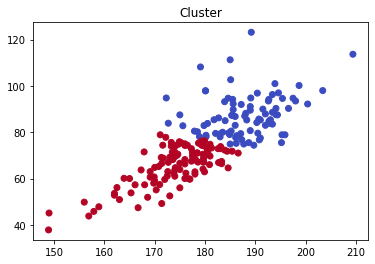

In [51]:
colors = {0: '#b40426',1: '#3b4cc0'}

colors = list(map(lambda x: colors[x], p2))
plt.scatter(df2["ht"], df2["wt"], c = colors, marker = "o", picker=True)
plt.title("Cluster")
plt.show

In [52]:
print(colors)

['#3b4cc0', '#3b4cc0', '#b40426', '#3b4cc0', '#b40426', '#b40426', '#3b4cc0', '#b40426', '#b40426', '#b40426', '#3b4cc0', '#3b4cc0', '#b40426', '#3b4cc0', '#b40426', '#b40426', '#b40426', '#b40426', '#3b4cc0', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#3b4cc0', '#b40426', '#3b4cc0', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#3b4cc0', '#3b4cc0', '#3b4cc0', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#3b4cc0', '#3b4cc0', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#3b4cc0', '#b40426', '#3b4cc0', '#3b4cc0', '#b40426', '#3b4cc0', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426', '#b40426'



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



